In [14]:
from langgraph.graph import StateGraph, START, END 
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv 
from typing import TypedDict, Annotated
from pydantic import BaseModel, Field 
import os 
import operator


In [3]:
load_dotenv()

True

In [5]:
os.environ['GOOGLE_API_KEY'] = os.getenv('gemini_api_key')

In [7]:
model = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

In [9]:
class EvaluationSchema(BaseModel):
    feedback: str = Field(description = 'Detailed Feedback for the Essay') 
    score: int = Field(description= 'Score out of 10', ge=0,le=10)

In [10]:
structured_model = model.with_structured_output(EvaluationSchema)  

In [11]:
essay = """AI and Its Impacts on India
Introduction

Artificial Intelligence (AI) has emerged as one of the most transformative technologies of the 21st century, redefining how societies produce, interact, and govern. In the Indian context, AI is not merely a technological trend but a strategic catalyst for national development. With its vast demographic dividend, digital infrastructure, and innovation potential, India stands at a pivotal moment where AI could significantly enhance productivity, inclusivity, and governance efficiency. However, this transformation also raises critical questions about employment, ethics, privacy, and equitable access. Understanding AI’s multifaceted impacts on India is therefore essential to harness its benefits responsibly.

1. Economic Impact
a. Boost to Productivity and Growth

AI-driven automation, data analytics, and predictive modeling are revolutionizing India’s key sectors — agriculture, manufacturing, finance, healthcare, and logistics. According to NASSCOM, AI could add nearly $500 billion to India’s GDP by 2025, accounting for about 10% of its growth. Intelligent automation in manufacturing (Industry 4.0), AI-powered supply chains, and algorithmic trading in financial services are examples of AI improving operational efficiency and decision-making accuracy.

b. Start-up Ecosystem and Innovation

India has become one of the fastest-growing AI start-up hubs globally. Bengaluru, Hyderabad, and Pune host several AI-driven enterprises working on natural language processing (NLP), computer vision, and machine learning (ML) applications tailored to Indian contexts such as regional language understanding and agricultural diagnostics. Initiatives like ‘AI for All’, the National AI Portal, and Startup India are nurturing this innovation ecosystem.

c. Employment and Skill Shifts

While automation threatens repetitive and low-skill jobs, AI also creates new employment opportunities in data science, AI ethics, cybersecurity, and robotics. The challenge lies in bridging the skills gap: a report by the World Economic Forum indicates that nearly 54% of Indian employees will require reskilling to adapt to AI-enabled workflows. Thus, investment in skill development and continuous learning becomes crucial.

2. Impact on Key Sectors
a. Agriculture

AI is driving the modernization of Indian agriculture through precision farming, crop health monitoring, and yield prediction. Startups like CropIn and Fasal use AI and satellite data to provide real-time insights to farmers, enhancing productivity while reducing resource wastage. AI-enabled drones and sensors also support early pest detection and soil quality assessment.

b. Healthcare

AI in healthcare is transforming diagnostics, treatment planning, and medical research. Tools like AI-based radiology scanners and predictive disease modeling improve early detection of diseases such as tuberculosis, cancer, and diabetes — especially in rural India, where medical expertise is limited. The Ayushman Bharat Digital Mission integrates AI to improve patient data management and healthcare accessibility.

c. Education

AI-based personalized learning platforms like Byju’s, Vedantu, and Toppr are reshaping the education sector by adapting content to individual student needs. Moreover, AI-enabled tools support multilingual education, making quality learning accessible to students from diverse linguistic backgrounds. The National Education Policy (NEP) 2020 emphasizes AI literacy, coding, and computational thinking from school level, recognizing AI as a foundational skill for the future.

d. Governance and Public Policy

AI is also being used to enhance governance efficiency. Projects such as AI-enabled crop insurance assessment, crime prediction models, and urban planning using geospatial AI exemplify how data-driven governance can improve transparency and resource allocation. The Digital India initiative integrates AI to streamline e-governance services, improve citizen engagement, and strengthen digital inclusion.

3. Social and Ethical Implications
a. Employment Displacement and Inequality

AI-driven automation may disproportionately impact low-income and less-educated workers, especially in the manufacturing and service sectors. Without targeted social safety nets and upskilling initiatives, AI could deepen economic inequality in India.

b. Bias and Fairness

AI models trained on unbalanced or biased data can reinforce societal prejudices related to caste, gender, or region. India’s diversity makes this challenge particularly critical. Developing transparent, explainable AI systems and enforcing ethical AI governance frameworks are necessary to prevent algorithmic discrimination.

c. Privacy and Data Protection

As AI systems rely heavily on personal data, issues of privacy and consent gain prominence. The Digital Personal Data Protection Act (2023) is a step forward, but robust implementation, cybersecurity measures, and public awareness are crucial to prevent misuse of data in AI systems.

4. Strategic and Policy Dimensions

The Government of India has recognized AI’s strategic importance through initiatives such as:

NITI Aayog’s National Strategy for Artificial Intelligence (NSAI), focusing on five key sectors: healthcare, agriculture, education, smart mobility, and smart cities.

Establishment of Centers of Excellence in AI across major academic institutions.

Promotion of AI research and innovation hubs under the Digital India and Make in India programs.

Furthermore, the IndiaAI Mission, launched in 2024, aims to integrate AI into public infrastructure, promote indigenous AI models, and encourage global collaborations while maintaining ethical and inclusive frameworks.

5. Global Position and Future Prospects

India’s strength lies in its human capital — a large pool of engineers, IT professionals, and data scientists. Combined with government-backed policies and private sector investment, India is positioned to become a global AI powerhouse. However, challenges remain: limited high-quality datasets, lack of hardware infrastructure (e.g., GPUs), regulatory uncertainty, and the digital divide between urban and rural areas.

To realize AI’s full potential, India must invest in:

AI education and research at all academic levels.

Public-private partnerships for innovation.

Ethical frameworks ensuring fairness and accountability.

Inclusive access, ensuring that rural and underprivileged populations benefit equally from AI advancements.

Conclusion

Artificial Intelligence offers India a historic opportunity to leapfrog traditional stages of development and establish itself as a global leader in innovation and digital transformation. Yet, this opportunity comes with profound responsibilities. The integration of AI must be human-centered, inclusive, and ethically governed to avoid deepening societal divides. By balancing innovation with regulation, and automation with human dignity, India can ensure that AI becomes not just a tool of progress but an enabler of equitable and sustainable development."""

In [12]:
prompt = f"Evalute the quality of the essay and provide a feedback and assign a score { essay}"  
structured_model.invoke(prompt)


EvaluationSchema(feedback="This essay provides a comprehensive and well-structured analysis of AI's multifaceted impacts on India. The introduction effectively sets the stage, highlighting AI as a strategic catalyst for national development while acknowledging inherent challenges. \n\n**Strengths:**\n- **Comprehensive Coverage:** The essay thoroughly explores economic impacts (productivity, start-up ecosystem, employment shifts), sector-specific applications (agriculture, healthcare, education, governance), social and ethical implications (displacement, bias, privacy), and strategic policy dimensions.\n- **Strong Evidence and Examples:** It effectively integrates relevant statistics (NASSCOM, WEF) and provides numerous concrete examples of AI's application in India (e.g., CropIn, Fasal, Byju's, Ayushman Bharat Digital Mission, Digital India initiatives). \n- **Policy Awareness:** The discussion on government initiatives like NITI Aayog's National Strategy, the IndiaAI Mission, NEP 2020

In [41]:
class UPSCState(TypedDict):

    essay: str 
    language_feedback: str 
    analysis_feedback: str 
    clarity_feedback: str
    overall_feedback: str 
    individual_scores: Annotated[list[int], operator.add]
    avg_score: float


In [42]:
def evaluate_language(state: UPSCState)-> UPSCState:

    prompt = f'Evaluate the language quality of the following essay and provide a feedback and assign a score out of 10 \n {state["essay"]}' 
    output = structured_model.invoke(prompt) 

    return {'language_feedback': output.feedback, 'individual_scores': [output.score]}

In [43]:
def evaluate_analysis(state: UPSCState)-> UPSCState:

    prompt = f'Evaluate the clarity of the thoughts the following essay and provide a feedback and assign a score out of 10 \n {state["essay"]}' 
    output = structured_model.invoke(prompt) 

    return {'analysis_feedback': output.feedback, 'individual_scores': [output.score]}

In [44]:
def evaluate_thoughts(state: UPSCState)-> UPSCState:

    prompt = f'Evaluate the depth of analysis of  the following essay and provide a feedback and assign a score out of 10 \n {state["essay"]}' 
    output = structured_model.invoke(prompt) 

    return {'clarity_feedback': output.feedback, 'individual_scores': [output.score]}

In [45]:
def final_evaluation(state: UPSCState)-> UPSCState:
    prompt = f"""Based on the following feedbacks create a summaried feedback \n language feedback- {state["language_feedback"]} \n depth of analysis feedback - {state['analysis_feedback']} \n clarity of thought feedback - \n {state['clarity_feedback']} """
    overall_feedback = model.invoke(prompt).content 
    avg_score = sum(state['individual_scores'])/ len(state['individual_scores']) 

    return {'overall_feedback': overall_feedback, 'avg_score': avg_score}

In [46]:
graph = StateGraph(UPSCState) 

In [ ]:
# adding nodes 
graph.add_node('evaluate_language',evaluate_language)
graph.add_node('evaluate_analysis',evaluate_analysis)
graph.add_node('evaluate_thoughts',evaluate_thoughts)
graph.add_node('final_evaluation',final_evaluation) 




ValueError: Node `evaluate_language` already present.

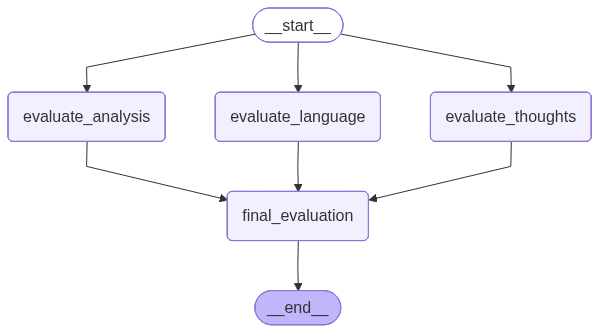

In [51]:
# ading edges 
graph.add_edge(START,'evaluate_language')
graph.add_edge(START,'evaluate_analysis')
graph.add_edge(START,'evaluate_thoughts')

# ading edges 
graph.add_edge('evaluate_language','final_evaluation')
graph.add_edge('evaluate_analysis','final_evaluation')
graph.add_edge('evaluate_thoughts','final_evaluation')

graph.add_edge('final_evaluation',END)

graph.compile()

In [52]:
workflow = graph.compile() 

In [54]:
print(workflow.invoke({"essay": essay}))

{'essay': 'AI and Its Impacts on India\nIntroduction\n\nArtificial Intelligence (AI) has emerged as one of the most transformative technologies of the 21st century, redefining how societies produce, interact, and govern. In the Indian context, AI is not merely a technological trend but a strategic catalyst for national development. With its vast demographic dividend, digital infrastructure, and innovation potential, India stands at a pivotal moment where AI could significantly enhance productivity, inclusivity, and governance efficiency. However, this transformation also raises critical questions about employment, ethics, privacy, and equitable access. Understanding AI’s multifaceted impacts on India is therefore essential to harness its benefits responsibly.\n\n1. Economic Impact\na. Boost to Productivity and Growth\n\nAI-driven automation, data analytics, and predictive modeling are revolutionizing India’s key sectors — agriculture, manufacturing, finance, healthcare, and logistics. 